In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#step1: sample dataset (10records and 3 columns)
data=np.array([
    [2.5,2.4,1.2],
    [0.5,0.7,0.3],
    [2.2,2.9,1.4],
    [1.9,2.2,1.1],
    [3.1,3.0,1.7],
    [2.3,2.7,1.5],
    [2.0,1.6,0.9],
    [1.0,1.1,0.4],
    [1.5,1.6,0.8],
    [1.1,0.9,0.2],
])
df=pd.DataFrame(data,columns=["X","Y","Z"])
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [ ]:
#step2: Standardize using pandas (avoids NaN issues) every feature should have mean of 0 and std deviation 1
standardized_data=(df-df.mean())/df.std()

In [ ]:
#step3= Covariance Matrix: to quantify the relationships between different features in the dataset
cov_matrix=np.cov(standardized_data.T)
cov_matrix

array([[1.        , 0.92592927, 0.93688744],
       [0.92592927, 1.        , 0.98192228],
       [0.93688744, 0.98192228, 1.        ]])

In [ ]:
#step4= Eigen decomposition: The eigenvectors represent the principal components, and the eigenvalues indicate the magnitude of variance explained by each component.
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)

In [ ]:
#step5: Sort the eigenvalues and eigenvectors: Arrange the eigenvectors in descending order of their corresponding eigenvalues, indicating the importance of each principal component
sorted_indices=np.argsort(eig_vals)[: :-1]
eig_vals=eig_vals[sorted_indices]
eig_vecs=eig_vecs[:, sorted_indices]

In [ ]:
#step6: select two top eigen vectors
eig_vecs_subset=eig_vecs[:,:2]

In [ ]:
#step7: Project data to new basis
reduced_data= standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df=pd.DataFrame(reduced_data,columns=["PC1","PC2"])
reduced_df

,PC1,PC2
0,1.114772,0.287461
1,-2.502976,-0.278755
2,1.461615,-0.429478
3,0.430754,-0.162708
4,2.517452,0.260130
5,1.508478,-0.278933
6,-0.129861,0.401224
7,-1.754639,-0.043244
8,-0.604269,-0.055335
9,-2.041325,0.299640


In [ ]:
#step 8: output the reduced data
print("\nReduced Data (after PCA):\n",reduced_df)


Reduced Data (after PCA):
         PC1       PC2
0  1.114772  0.287461
1 -2.502976 -0.278755
2  1.461615 -0.429478
3  0.430754 -0.162708
4  2.517452  0.260130
5  1.508478 -0.278933
6 -0.129861  0.401224
7 -1.754639 -0.043244
8 -0.604269 -0.055335
9 -2.041325  0.299640


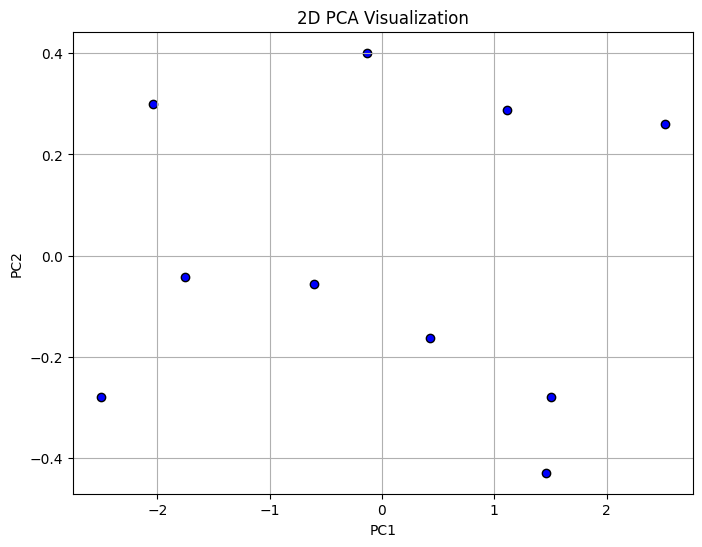

In [ ]:
#step 9: Visualize
plt.figure(figsize=(8,6))
plt.scatter(reduced_df["PC1"],reduced_df["PC2"],c="blue",edgecolor="k")
plt.title("2D PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()